# 🌍 Solar Potential Comparison: Benin 🇧🇯 | Sierra Leone 🇸🇱 | Togo 🇹🇬

*Evaluating Global Horizontal Irradiance (GHI), Direct Normal Irradiance (DNI), and Diffuse Horizontal Irradiance (DHI) for strategic solar deployment.*


In [2]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, kruskal
import warnings
import sys
sys.path.append('../scripts')
from visualization_utils import plot_boxplots_comparison

In [3]:
#suppress all warnings
warnings.filterwarnings("ignore")



## 📌1. Introduction

Welcome to the **Cross-Country Solar Potential Analysis** — a project developed as part of the **10 Academy Week 1 Challenge** for candidates aspiring to join the 12-week intensive training in:

- 🛠️ **Data Engineering (DE)**
- 📊 **Financial Analytics (FA)**
- 🤖 **Machine Learning Engineering (MLE)**

This notebook focuses on **analyzing and comparing solar radiation data** from three West African countries: **Benin**, **Sierra Leone**, and **Togo**. Using exploratory data analysis, statistical comparisons, and visualization techniques, we aim to:

- Assess **solar energy potential** across countries,
- Identify key **variations and patterns**, and
- Deliver **insights** to guide strategic solar investments for **MoonLight Energy Solutions**.

---

## 🧭 Background

🌞 **MoonLight Energy Solutions** is on a mission to scale clean energy deployment by identifying the most promising regions for **solar installation**. This project supports that mission by evaluating environmental data collected in **Benin**, **Sierra Leone**, and **Togo**, including:

- ☀️ **GHI (Global Horizontal Irradiance)** – Total solar radiation on a horizontal surface
- 🔆 **DNI (Direct Normal Irradiance)** – Direct solar radiation perpendicular to the sun’s rays
- 🌤️ **DHI (Diffuse Horizontal Irradiance)** – Solar radiation received indirectly

Other recorded environmental variables include **air temperature**, **humidity**, **wind speed**, **precipitation**, and **sensor cleaning events**.

📈 This notebook will:
- Visualize solar metrics across countries using **boxplots** and **bar charts**
- Compare country-level averages with a **summary statistics table**
- Run statistical tests like **ANOVA** or **Kruskal–Wallis** to check for significant differences
- Summarize key takeaways to support **data-driven decision-making**

---


## 📦 2. Data Loading & Overview  <a id= '2-data-loading--overview'></a>

➤ Load data

In [4]:
benin = pd.read_csv('../data/benin_clean.csv')
togo = pd.read_csv('../data/togo_clean.csv')
sl = pd.read_csv('../data/sierraleone_clean.csv')


➤ Add a country label to each DataFrame

In [5]:
benin['country'] = 'Benin'
togo['country'] = 'Togo'
sl['country'] = 'Sierra Leone'


➤ Add a country label to each DataFrame

In [6]:
benin['country'] = 'Benin'
togo['country'] = 'Togo'
sl['country'] = 'Sierra Leone'


➤ Concatenate

In [7]:
df = pd.concat([benin, togo, sl], ignore_index=True)

In [8]:
df.sample(10)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,country
1348471,2022-05-24 10:32:00,6.717,6.171,6.047,6.650,6.623,28.0,75.2,0.6,1.4,0.6,54.0,14.5,1002,0,0.0,52.6,48.3,Sierra Leone
1459634,2022-08-09 15:15:00,6.300,5.248,5.951,6.218,6.199,29.1,79.0,0.4,1.4,0.5,302.1,22.1,1000,0,0.0,52.1,52.6,Sierra Leone
824088,2022-05-20 06:49:00,5.177,5.295,4.748,4.798,4.790,26.4,72.9,2.5,3.9,0.7,225.0,9.1,978,0,0.0,32.4,32.9,Togo
672140,2022-02-03 18:21:00,0.000,0.000,0.000,0.182,0.182,28.9,10.1,1.8,2.4,0.3,11.8,5.2,976,0,0.0,25.2,26.0,Togo
225059,2022-04-04 07:00:00,1.932,0.182,1.960,2.695,2.653,20.0,85.0,0.0,0.0,0.0,0.0,0.0,999,0,0.0,19.4,19.7,Benin
347193,2022-06-28 02:34:00,0.000,0.000,0.000,0.000,0.000,22.3,100.0,0.4,1.4,0.5,135.1,2.3,1001,0,0.0,22.8,23.1,Benin
349489,2022-06-29 16:50:00,6.266,6.540,5.080,5.956,5.932,30.9,73.0,2.0,3.4,0.7,249.4,12.7,999,0,0.0,39.7,43.4,Benin
273873,2022-05-08 04:34:00,0.000,0.000,0.000,0.000,0.000,23.3,94.3,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,23.1,23.5,Benin
726330,2022-03-13 09:31:00,6.460,5.970,5.803,6.448,6.368,33.4,47.8,3.8,4.9,0.5,235.6,11.4,975,0,0.0,50.6,59.4,Togo
721289,2022-03-09 21:30:00,0.000,0.000,0.000,0.000,0.000,31.8,10.2,1.7,2.1,0.4,10.8,14.9,973,0,0.0,29.2,29.5,Togo


## 📊 3. Metric Comparison

### ➤ Boxplots

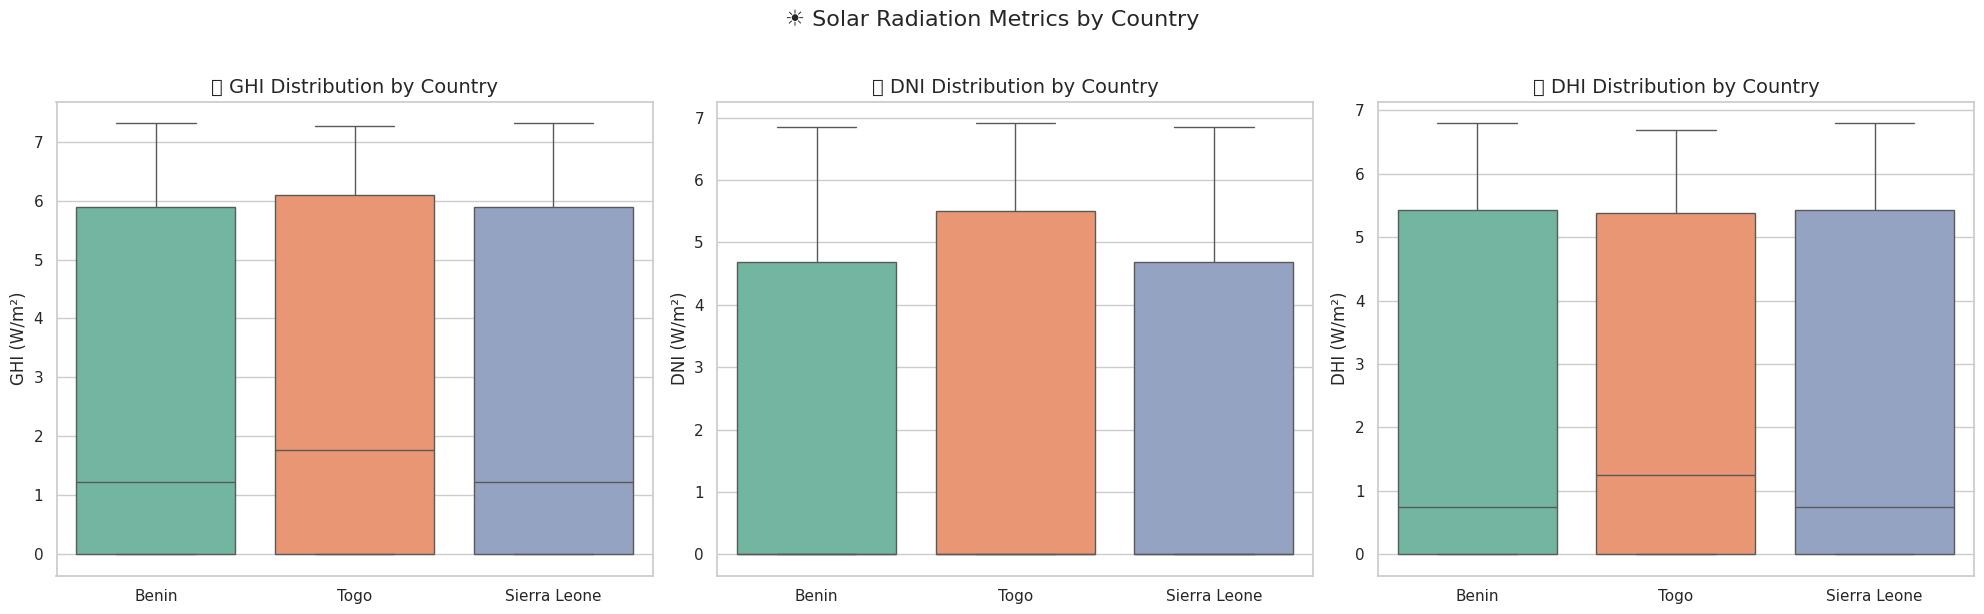

In [9]:
#Create three side-by-side boxplots (use col='metric' if using FacetGrid or three subplots manually):
plot_boxplots_comparison(df)